# Naive Bayes

เราจะสร้างโมเดล Gaussian Naive Bayes กับข้อมูล Iris ที่ Scikit-Learn มีให้มา

In [1]:
%matplotlib inline

from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

แบ่งข้อมูลเป็น 2 ส่วน ส่วนแรกเป็นข้อมูลสำหรับ training และอีกส่วนเป็นข้อมูลสำหรับ testing

In [2]:
np.random.seed(0)

iris = datasets.load_iris()
X, y = iris.data, iris.target

indices = np.random.permutation(len(X))

X_train = X[indices[:-30]]
y_train = y[indices[:-30]]

X_test = X[indices[-30:]]
y_test = y[indices[-30:]]

โมเดล Gaussian Naive Bayes

In [3]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

หลังจากโมเดลเสร็จ ลองทดสอบดูว่าโมเดลของเราจะบอกได้ไหมว่าดอกไอริชที่มีกลีบเลี้ยงขนาด 3x5 ซม. และกลีบดอกขนาด 4x2 ซม. เป็นดอกไอริชประเภทไหน

In [4]:
result = gnb.predict([[3, 5, 4, 2],])

print(iris.target_names[result])

['virginica']


แล้วถ้ากลีบเลี้ยงขนาด 5.1x3.4 ซม. และกลีบดอกขนาด 1.2x0.1 ซม. โมเดลจะบอกว่าเป็นดอกไอรีชประเภทไหน

In [5]:
result = gnb.predict([[5.1, 3.4, 1.2, 0.1],])

print(iris.target_names[result])

['setosa']


ดูค่าความแม่นยำของโมเดลกับชุดข้อมูลที่เตรียมไว้สำหรับ testing ในตอนแรก

In [6]:
y_pred = gnb.predict(X_test)

print(accuracy_score(y_test, y_pred))

0.933333333333


ดูค่าเมตริกต่างๆ

In [7]:
target_names = iris.target_names
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       1.00      0.82      0.90        11
  virginica       0.82      1.00      0.90         9

avg / total       0.95      0.93      0.93        30



ลองทำ Visualization

In [8]:
X = iris.data[:, :2] # take only two features
y = iris.target
h = .02 # step size in the mesh

In [9]:
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

In [10]:
gnb = GaussianNB()
gnb.fit(X, y)

GaussianNB()

พล็อก decision boundary

In [11]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = gnb.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

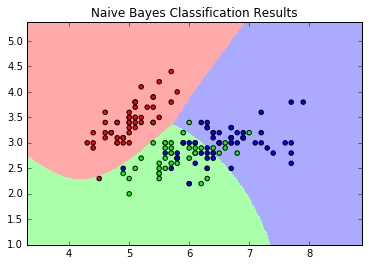

In [12]:
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Naive Bayes Classification Results')
plt.show()